In [25]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [67]:

def epsilon_reader(fstr = "singlet-TDA-BAR_SCR-full", folder='.', 
                   plot=True,
                   save_fig=True):
    
    Is = []
    for oc in [11,22,33]:
        file = "%s/EPSILON_BSE-%s_OC%d.OUT"%(folder,fstr,oc)
        data = np.loadtxt(file)
        E = data[:,0]
        I = data[:,2]
        Is.append(I)

    broadening = 'nan'
    with open(file) as f:
        lines = f.readlines()
    for i, line in enumerate(lines):
        if line.startswith('# Used broadening in scaled energy units:'):
            broadening = float(line.split()[7])

    da = xr.DataArray(data=np.array(Is),
                      coords=[11+11*np.arange(3),E],
                      dims=['OC', 'energy'],
                      attrs={'fstr':fstr,'broadening':broadening})
    
    if plot:  
        plt.figure()
        da.isel(OC=0).plot(color='r',label='OC11')
        da.isel(OC=1).plot(color='g',label='OC22')
        da.isel(OC=2).plot(color='b',label='OC33')
        da.mean(dim=['OC']).plot(color='k',label='mean')     
        plt.legend()
        plt.tight_layout()
        
    if save_fig:
        plt.savefig("%s/EPSILON_BSE-%s.pdf"%(folder,fstr))
    
    return da

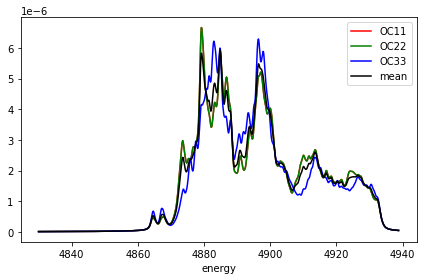

In [68]:
da = epsilon_reader(fstr = "singlet-TDA-BAR_SCR-full", folder='EPSILON')

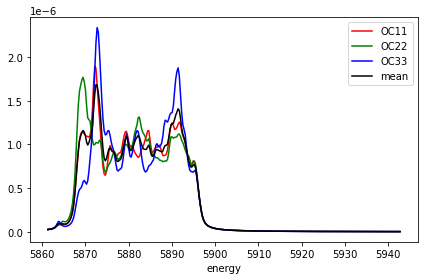

In [69]:
da = epsilon_reader(fstr = "singlet-TDA-BAR_SCR-full", folder='/data/mtopsakal/simulations/MSEE-standards/CrCl2/EXCITING/try1/EPSILON')

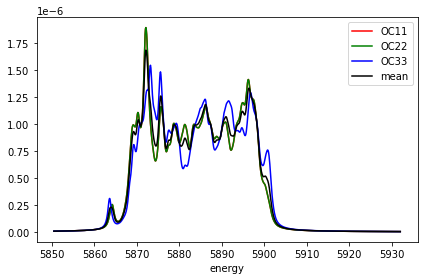

In [71]:
da = epsilon_reader(fstr = "singlet-TDA-BAR_SCR-full", folder='/data/mtopsakal/simulations/MSEE-standards/ZnCl2/EXCITING/try0_cheap_gqmax=1/EPSILON')